Saving dramatic-scenery-3840x2160-20802.jpg to dramatic-scenery-3840x2160-20802 (4).jpg


/tmp/ipython-input-2657414578.py:21: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img_gray))
/tmp/ipython-input-2657414578.py:21: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img_gray))
/tmp/ipython-input-2657414578.py:22: RuntimeWarning: divide by zero encountered in log
  log_gray = c * (np.log(img_gray + 1))
/tmp/ipython-input-2657414578.py:22: RuntimeWarning: invalid value encountered in multiply
  log_gray = c * (np.log(img_gray + 1))
/tmp/ipython-input-2657414578.py:23: RuntimeWarning: invalid value encountered in cast
  log_gray = np.array(log_gray, dtype=np.uint8)


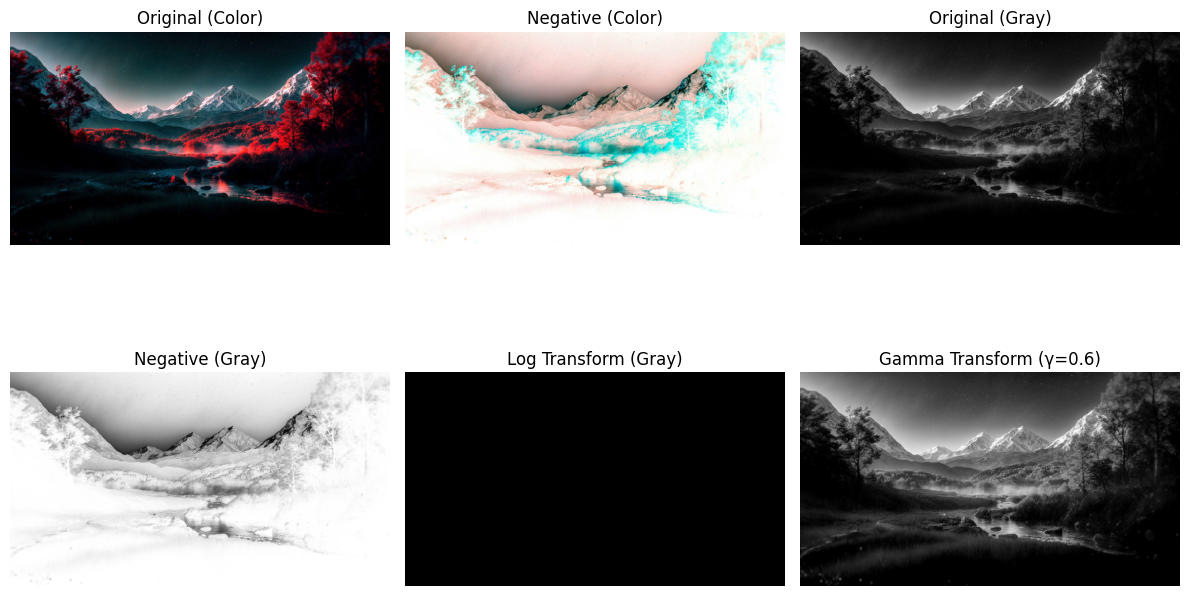

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()
filename = next(iter(uploaded))


image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



neg_gray = 255 - img_gray

c = 255 / np.log(1 + np.max(img_gray))
log_gray = c * (np.log(img_gray + 1))
log_gray = np.array(log_gray, dtype=np.uint8)


gamma = 0.6
gamma_corrected = np.power(img_gray / 255.0, gamma) * 255
gamma_corrected = np.array(gamma_corrected, dtype=np.uint8)


plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title("Original (Color)")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Negative (Color)")
plt.imshow(neg_rgb)
plt.axis("off")

plt.subplot(2,3,3)
plt.title("Original (Gray)")
plt.imshow(img_gray, cmap='gray')
plt.axis("off")

plt.subplot(2,3,4)
plt.title("Negative (Gray)")
plt.imshow(neg_gray, cmap='gray')
plt.axis("off")

plt.subplot(2,3,5)
plt.title("Log Transform (Gray)")
plt.imshow(log_gray, cmap='gray')
plt.axis("off")

plt.subplot(2,3,6)
plt.title(f"Gamma Transform (γ={gamma})")
plt.imshow(gamma_corrected, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()
